# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print('Training Set')
print(len(X_train))
print(X_train.shape)
print(y_train.shape)

Training Set
60000
(60000, 28, 28)
(60000,)


In [6]:
print('Testing Set')
print(len(X_test))
print(X_test.shape)
print(y_test.shape)

Testing Set
10000
(10000, 28, 28)
(10000,)


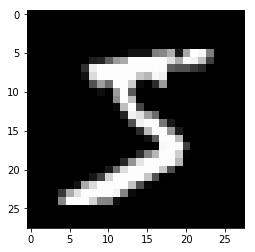

In [8]:
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

# Preprocessing

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)

X_train_flat.shape

(60000, 784)

In [10]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [12]:
X_train_flat = X_train_flat.astype('float32')
X_test_flat = X_test_flat.astype('float32')
X_train_flat /= 255.0
X_test_flat /= 255.0

In [13]:
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train,  y_test))
X_all_flat = np.concatenate((X_train_flat, X_test_flat))
y_all_cat = np.concatenate((y_train_cat, y_test_cat))

# Model Fitting

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
import pickle

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()
model.fit(X_train_flat, y_train)
pred = model.predict(X_test_flat)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 960    0    1    2    0    5    6    3    1    2]
 [   0 1112    3    1    0    1    5    1   12    0]
 [   8    8  920   20    9    5   10   11   37    4]
 [   4    0   17  919    2   22    4   12   21    9]
 [   1    2    5    3  914    0   10    2    7   38]
 [  10    2    0   41   10  770   17    7   28    7]
 [   9    3    7    2    6   20  907    1    3    0]
 [   2    7   22    5    8    1    1  950    5   27]
 [  10   14    5   21   14   27    7   11  853   12]
 [   8    8    2   13   31   14    0   24   12  897]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92   

In [18]:
model = LogisticRegression(X_all_flat, y_all)
pickle.dump(model, open('E:/Models/Digit-Recognition/LogisticRegression.pkl', 'wb'))

## Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier()
model.fit(X_train_flat, y_train)
pred = model.predict(X_test_flat)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 966    0    2    1    0    2    6    1    2    0]
 [   0 1124    3    3    0    2    2    0    1    0]
 [   7    0  982    4    6    2    4   15   11    1]
 [   5    0   21  941    1   13    0   10   14    5]
 [   3    0    2    1  934    0    9    4    9   20]
 [   8    3    6   33    4  816    5    3    9    5]
 [  14    3    2    2   11    6  918    0    2    0]
 [   0   10   20    6    6    1    1  968    2   14]
 [   4    0   19   22   11   14    8    4  884    8]
 [   8    6    4   14   31    6    0    8   10  922]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.93      0.95      0.94      1032
           3       0.92      0.93      0.92      1010
           4       0.93      0.95      0.94       982
           5       0.95      0.91      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94   

In [21]:
model = RandomForestClassifier(X_all_flat, y_all)
pickle.dump(model, open('E:/Models/Digit-Recognition/RandomForestClassifier.pkl', 'wb'))

## MultinomialNB

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
model = MultinomialNB()
model.fit(X_train_flat, y_train)
pred = model.predict(X_test_flat)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    1    6    0   52    1]
 [  15   11  858   24   10    3   32   12   66    1]
 [   4   11   34  852    1   19    7   14   41   27]
 [   2    2    6    0  731    0   25    1   38  177]
 [  23   12    6  108   18  586   17    6   79   37]
 [  18   13   17    1    8   24  859    0   18    0]
 [   1   21   11    5   18    0    1  861   41   69]
 [   6   26   13   55   14   27    8    9  776   40]
 [   6    8    3   11   65    9    1   18   27  861]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.74      0.79       982
           5       0.87      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.93      0.84   

In [24]:
model = MultinomialNB(X_all_flat, y_all)
pickle.dump(model, open('E:/Models/Digit-Recognition/MultinomialNB.pkl', 'wb'))

## Artificial Neural Network

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1)
filepath = "E:/Models/Digit-Recognition/ANN.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

def build_network():
    model = Sequential()
    model.add(Dense(1024,input_dim=784, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = build_network()

model.fit(X_all_flat, y_all_cat, validation_split=0.3, epochs=50, callbacks=[es, ckpt])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                32800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 836,970
Trainable params: 836,970
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 49000 samples, validate on 21000 samples
Epoch 1/50
49000/49000 [==============

## Convolutional Neural Network

In [32]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1)
filepath = "E:/Models/Digit-Recognition/CNN.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

def cnn(image_size):
    classifier = Sequential()
    classifier.add(Conv2D(32, (3, 3), input_shape = (*image_size, 1), activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 10, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    classifier.summary()
    return classifier


model = cnn((28,28))

model.fit(X_all, y_all_cat, validation_split=0.3, epochs=50, callbacks=[es, ckpt])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________
